<a href="https://colab.research.google.com/github/Saketkr06/Machine-learning-projects/blob/main/Classification_with_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_circles

n_samples=1000
X,y=make_circles(n_samples,
                 noise=0.03,
                 random_state=42)

In [3]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [4]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [5]:
import pandas as pd
circles=pd.DataFrame({'X0':X[:,0],'X1':X[:,1],'label':y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [6]:
# Check out the different labels
circles.label.value_counts()

1    500
0    500
Name: label, dtype: int64

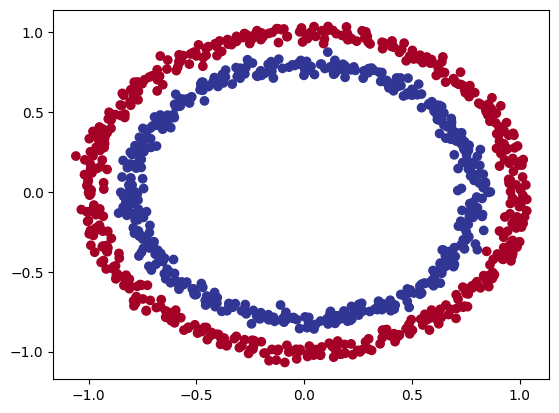

In [7]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

In [8]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [9]:

# View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

In [10]:
tf.random.set_seed(42)

model_1=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

model_1.fit(X,y,epochs=5)

Epoch 1/5
32/32 [==============================] - 5s 5ms/step - loss: 3.1538 - accuracy: 0.4700
Epoch 2/5
32/32 [==============================] - 0s 5ms/step - loss: 0.7803 - accuracy: 0.4960
Epoch 3/5
32/32 [==============================] - 0s 4ms/step - loss: 0.7159 - accuracy: 0.4910
Epoch 4/5
32/32 [==============================] - 0s 4ms/step - loss: 0.7008 - accuracy: 0.4950
Epoch 5/5
32/32 [==============================] - 0s 4ms/step - loss: 0.6965 - accuracy: 0.5000


In [11]:
# Train our model for longer (more chances to look at the data)
model_1.fit(X, y, epochs=200, verbose=0) # set verbose=0 to remove training updates
model_1.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

In [12]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model (same as model_1 but with an extra layer)
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1), # add an extra layer
  tf.keras.layers.Dense(1) 
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit the model
model_2.fit(X, y, epochs=100, verbose=0) # set verbose=0 to make the output print less
     

In [13]:
# Evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6932704448699951, 0.5]

In [14]:
tf.random.set_seed(42)
model_3=tf.keras.Sequential([
  tf.keras.layers.Dense(100), # add 100 dense neurons
  tf.keras.layers.Dense(10), # add another layer with 10 neurons
  tf.keras.layers.Dense(1)  
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(), # use Adam instead of SGD
                metrics=['accuracy'])

# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=1) # fit for 100 passes of the data

Epoch 1/100
32/32 [==============================] - 2s 4ms/step - loss: 2.9051 - accuracy: 0.4580
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7426 - accuracy: 0.4620
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7058 - accuracy: 0.4580
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6955 - accuracy: 0.4590
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6944 - accuracy: 0.4790
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6941 - accuracy: 0.4610
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6941 - accuracy: 0.5110
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6951 - accuracy: 0.4950
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6950 - accuracy: 0.4990
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6945 - accuracy: 0.4370
Epoch 11/

In [15]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class 
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 1ms/step
doing binary classifcation...


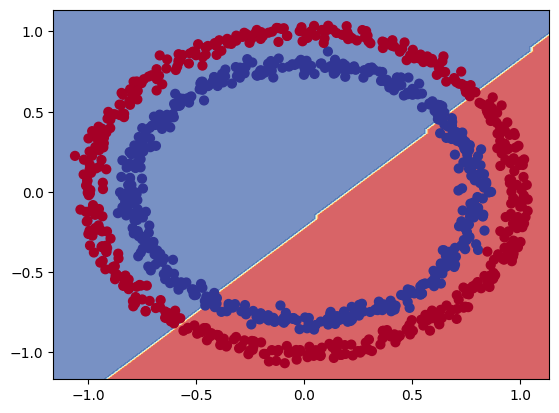

In [16]:
# Check out the predictions our model is making
plot_decision_boundary(model_3, X, y)

In [18]:
# Set random seed
tf.random.set_seed(42)

# Create some regression data
X_regression = np.arange(0, 1000, 5)
y_regression = np.arange(100, 1100, 5)

# Split it into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the data
# Note: Before TensorFlow 2.7.0, this line would work
# model_3.fit(X_reg_train, y_reg_train, epochs=100)

# After TensorFlow 2.7.0, see here for more: https://github.com/mrdbourke/tensorflow-deep-learning/discussions/278
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), 
            y_reg_train,
            epochs=100)

Epoch 1/100


ValueError: ignored

In [19]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               300       
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,321
Trainable params: 1,321
Non-trainable params: 0
_________________________________________________________________


In [20]:
# Setup random seed
tf.random.set_seed(42)

# Recreate the model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Change the loss and metrics of our compiled model
model_3.compile(loss=tf.keras.losses.mae, # change the loss function to be regression-specific
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae']) # change the metric to be regression-specific

# Fit the recompiled model
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), 
            y_reg_train, 
            epochs=100)
     

Epoch 1/100
5/5 [==============================] - 1s 6ms/step - loss: 402.0253 - mae: 402.0253
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 282.4611 - mae: 282.4611
Epoch 3/100
5/5 [==============================] - 0s 5ms/step - loss: 166.5825 - mae: 166.5825
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 56.6061 - mae: 56.6061
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 75.2472 - mae: 75.2472
Epoch 6/100
5/5 [==============================] - 0s 6ms/step - loss: 80.4461 - mae: 80.4461
Epoch 7/100
5/5 [==============================] - 0s 5ms/step - loss: 50.3466 - mae: 50.3466
Epoch 8/100
5/5 [==============================] - 0s 5ms/step - loss: 51.0509 - mae: 51.0509
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 46.1169 - mae: 46.1169
Epoch 10/100
5/5 [==============================] - 0s 5ms/step - loss: 45.9954 - mae: 45.9954
Epoch 11/100
5/5 [==============================] - 0

2/2 [==============================] - 0s 5ms/step


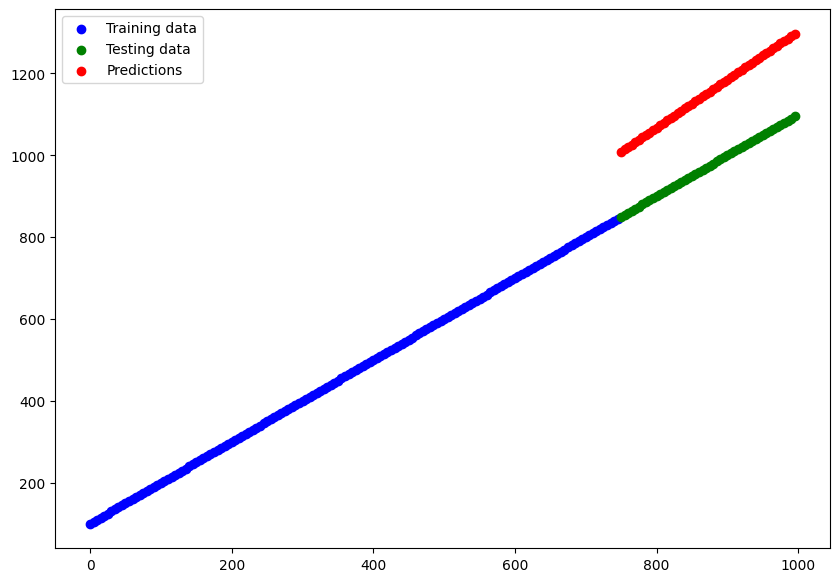

In [21]:
 #Make predictions with our trained model
y_reg_preds = model_3.predict(y_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c='b', label='Training data')
plt.scatter(X_reg_test, y_reg_test, c='g', label='Testing data')
plt.scatter(X_reg_test, y_reg_preds.squeeze(), c='r', label='Predictions')
plt.legend();

In [22]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.linear), # 1 hidden layer with linear activation
  tf.keras.layers.Dense(1) # output layer
])

# Compile the model
model_4.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # note: "lr" used to be what was used, now "learning_rate" is favoured
                metrics=["accuracy"])

# Fit the model
history = model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 6ms/step - loss: 4.2785 - accuracy: 0.4680
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 4.1948 - accuracy: 0.4660
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 4.0973 - accuracy: 0.4660
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 3.9722 - accuracy: 0.4700
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 3.9156 - accuracy: 0.4700
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 3.8480 - accuracy: 0.4690
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 3.7287 - accuracy: 0.4700
Epoch 8/100
32/32 [==============================] - 0s 5ms/step - loss: 3.6132 - accuracy: 0.4720
Epoch 9/100
32/32 [==============================] - 0s 5ms/step - loss: 3.5416 - accuracy: 0.4740
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 3.4564 - accuracy: 0.4710
Epoch 11/

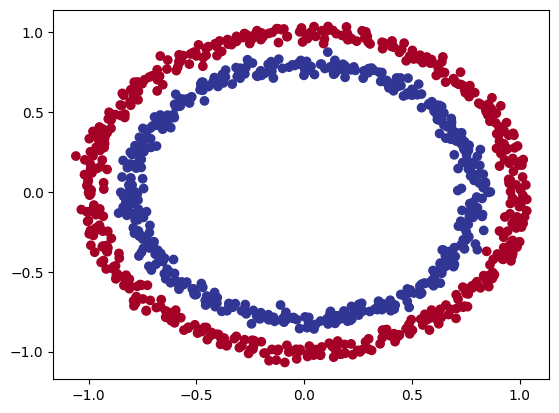

In [23]:
# Check out our data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


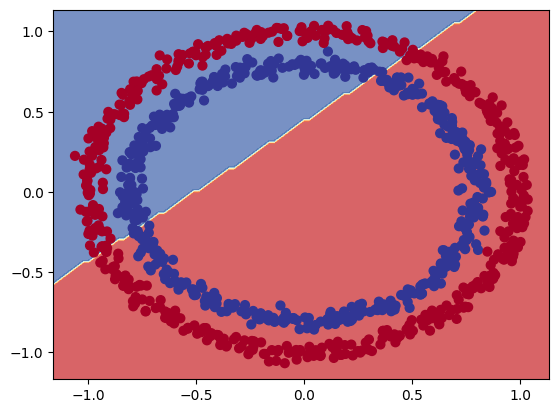

In [24]:
# Check the deicison boundary (blue is blue class, yellow is the crossover, red is red class)
plot_decision_boundary(model_4, X, y)
     

In [25]:
# Set random seed
tf.random.set_seed(42)

# Create a model with a non-linear activation
model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.relu), # can also do activation='relu'
  tf.keras.layers.Dense(1) # output layer 
])

# Compile the model
model_5.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 4ms/step - loss: 1.7454 - accuracy: 0.4640
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 1.4247 - accuracy: 0.4660
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 1.3380 - accuracy: 0.4660
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 1.2797 - accuracy: 0.4660
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 1.2318 - accuracy: 0.4660
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 1.1918 - accuracy: 0.4670
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 1.1570 - accuracy: 0.4670
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 1.1277 - accuracy: 0.4670
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 1.1001 - accuracy: 0.4710
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 1.0755 - accuracy: 0.4710
Epoch 11/

In [26]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_6 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 1, 4 neurons, ReLU activation
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 2, 4 neurons, ReLU activation
  tf.keras.layers.Dense(1) # ouput layer
])

# Compile the model
model_6.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.001), # Adam's default learning rate is 0.001
                metrics=['accuracy'])

# Fit the model
history = model_6.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 2s 4ms/step - loss: 5.0590 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 3.8988 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 3.3698 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 3.0674 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 2.8477 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 2.5612 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 2.2325 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 1.7574 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 1.2381 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 1.1791 - accuracy: 0.5000
Epoch 11/

In [27]:
# Evaluate the model
model_6.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6844 - accuracy: 0.5400


[0.6844004392623901, 0.5400000214576721]

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


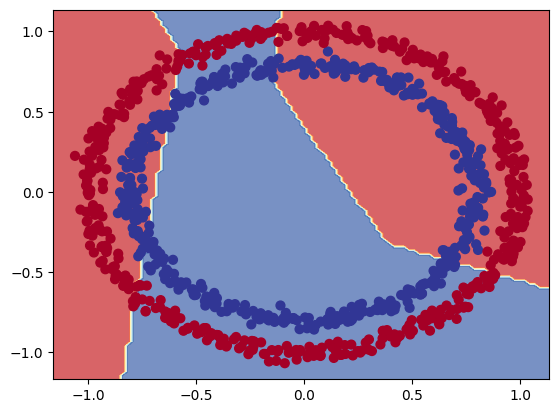

In [28]:
# Check out the predictions using 2 hidden layers
plot_decision_boundary(model_6, X, y)
     

In [29]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_7 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 1, ReLU activation
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 2, ReLU activation
  tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid) # ouput layer, sigmoid activation
])

# Compile the model
model_7.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history = model_7.fit(X, y, epochs=100, verbose=0)

In [30]:
# Evaluate our model
model_7.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5000


[0.6931496858596802, 0.5]

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


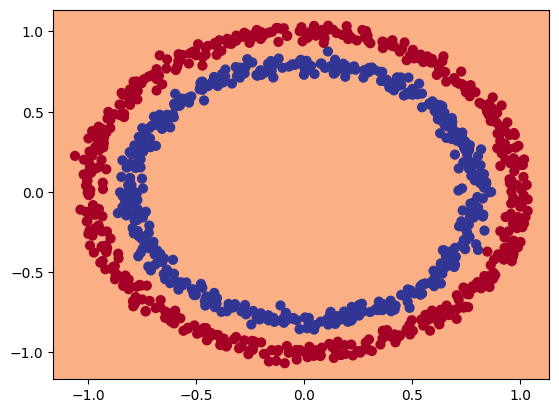

In [31]:
# View the predictions of the model with relu and sigmoid activations
plot_decision_boundary(model_7, X, y)

In [32]:
# Create a toy tensor (similar to the data we pass into our model)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

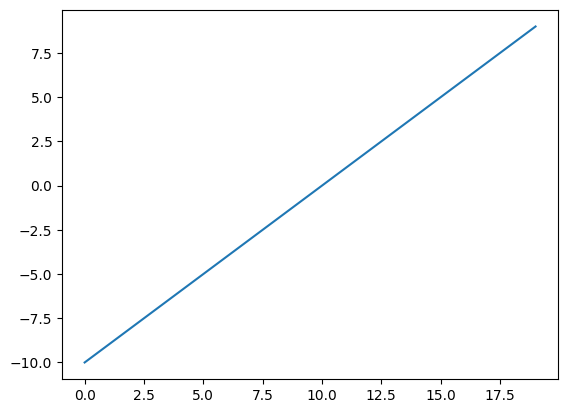

In [33]:
# Visualize our toy tensor
plt.plot(A);

In [34]:
# Sigmoid - https://www.tensorflow.org/api_docs/python/tf/keras/activations/sigmoid
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# Use the sigmoid function on our tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397868e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726230e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105854e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

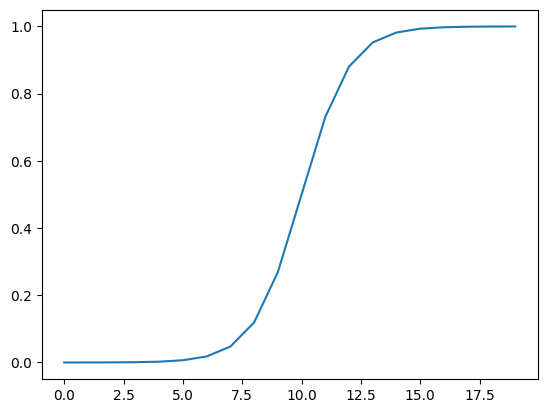

In [35]:
# Plot sigmoid modified tensor
plt.plot(sigmoid(A));

In [36]:
# ReLU - https://www.tensorflow.org/api_docs/python/tf/keras/activations/relu
def relu(x):
  return tf.maximum(0, x)

# Pass toy tensor through ReLU function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

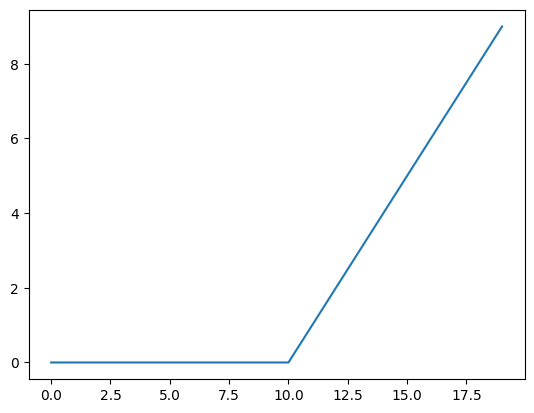

In [37]:
# Plot ReLU-modified tensor
plt.plot(relu(A));

In [38]:
# Linear - https://www.tensorflow.org/api_docs/python/tf/keras/activations/linear (returns input non-modified...)
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

In [39]:
# Does the linear activation change anything?
A == tf.keras.activations.linear(A)
     

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

Evaluating and improving our classification model

In [40]:
len(X)

1000

In [41]:
X_train,y_train=X[:800],y[:800]
X_test,y_test=X[800:],y[800:]

X_train.shape, X_test.shape

((800, 2), (200, 2))

In [43]:
tf.random.set_seed(42)

model_8=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model_8.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.01),
                metrics=['accuracy'])
history = model_8.fit(X_train, y_train, epochs=25)
     

Epoch 1/25
25/25 [==============================] - 2s 15ms/step - loss: 0.7178 - accuracy: 0.4863
Epoch 2/25
25/25 [==============================] - 0s 12ms/step - loss: 0.7088 - accuracy: 0.4700
Epoch 3/25
25/25 [==============================] - 0s 12ms/step - loss: 0.7048 - accuracy: 0.4700
Epoch 4/25
25/25 [==============================] - 0s 13ms/step - loss: 0.7018 - accuracy: 0.4712
Epoch 5/25
25/25 [==============================] - 0s 14ms/step - loss: 0.7002 - accuracy: 0.4675
Epoch 6/25
25/25 [==============================] - 0s 9ms/step - loss: 0.6988 - accuracy: 0.4538
Epoch 7/25
25/25 [==============================] - 0s 6ms/step - loss: 0.6974 - accuracy: 0.4675
Epoch 8/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6962 - accuracy: 0.4712
Epoch 9/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6947 - accuracy: 0.4762
Epoch 10/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6940 - accuracy: 0.4775
Epoch 11/25
25

In [44]:
# Evaluate our model on the test set
loss, accuracy = model_8.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

7/7 [==============================] - 0s 3ms/step - loss: 0.6972 - accuracy: 0.4500
Model loss on the test set: 0.6971805691719055
Model accuracy on the test set: 45.00%


313/313 [==============================] - 1s 2ms/step
doing binary classifcation...
313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


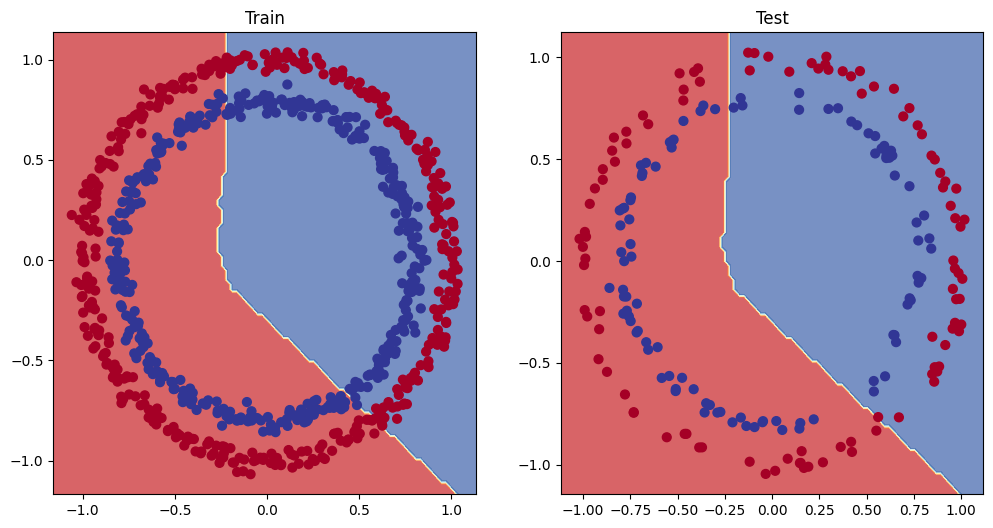

In [45]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, X=X_test, y=y_test)
plt.show()

In [46]:

# You can access the information in the history variable using the .history attribute
pd.DataFrame(history.history)

,loss,accuracy
0,0.717762,0.48625
1,0.708848,0.47000
2,0.704767,0.47000
3,0.701813,0.47125
4,0.700157,0.46750
5,0.698752,0.45375
6,0.697395,0.46750
7,0.696169,0.47125
8,0.694702,0.47625
9,0.694029,0.47750


Text(0.5, 1.0, 'Model_8 training curves')

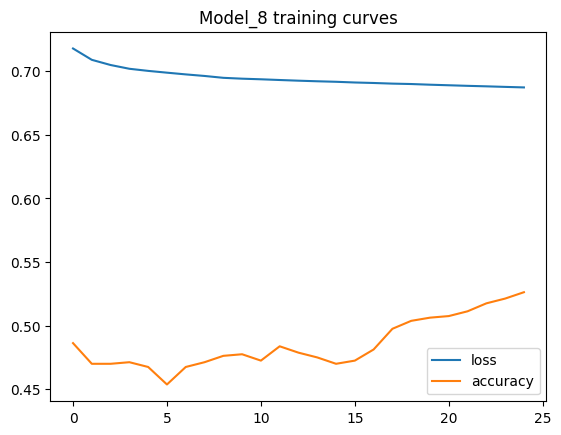

In [47]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_8 training curves")

## Finding Best Learning Rate


In [48]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as model_8)
model_9 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_9.compile(loss="binary_crossentropy", # we can use strings here too
              optimizer="Adam", # same as tf.keras.optimizers.Adam() with default settings
              metrics=["accuracy"]) 

# Create a learning rate scheduler callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20)) # traverse a set of learning rate values starting from 1e-4, increasing by 10**(epoch/20) every epoch

# Fit the model (passing the lr_scheduler callback)
history = model_9.fit(X_train, 
                      y_train, 
                      epochs=100,
                      callbacks=[lr_scheduler])
     

Epoch 1/100
25/25 [==============================] - 2s 4ms/step - loss: 0.6950 - accuracy: 0.5050 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6944 - accuracy: 0.5075 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6939 - accuracy: 0.5100 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6933 - accuracy: 0.5100 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.5113 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6922 - accuracy: 0.5125 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6916 - accuracy: 0.5113 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6910 - accuracy: 0.5075 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss:

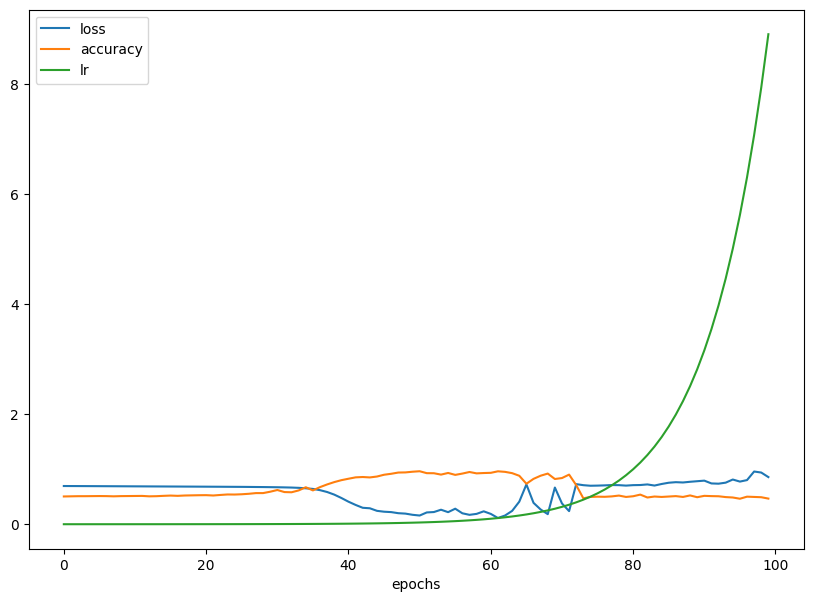

In [49]:
# Checkout the history
pd.DataFrame(history.history).plot(figsize=(10,7), xlabel="epochs");

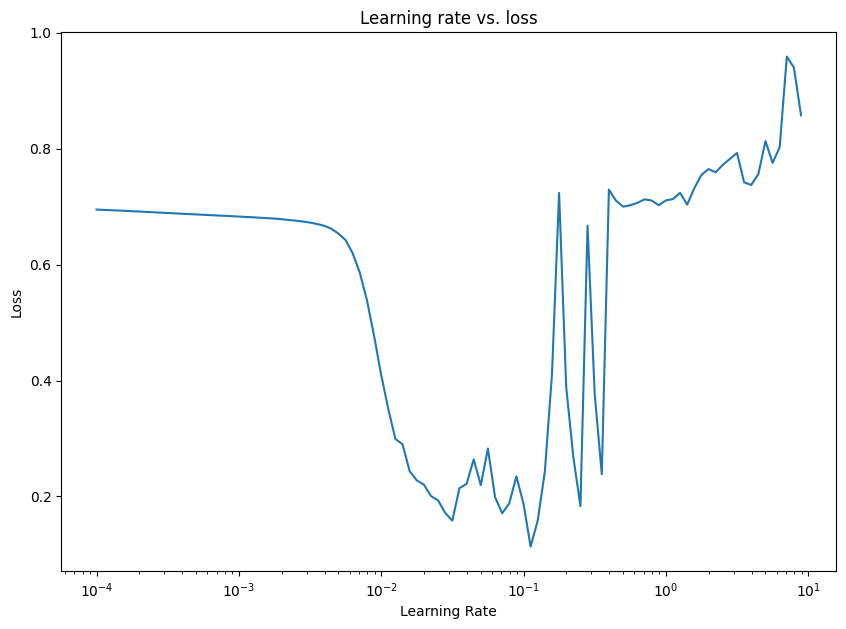

In [50]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (np.arange(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history["loss"]) # we want the x-axis (learning rate) to be log scale
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");

In [51]:
# Example of other typical learning rate values
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [52]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_10 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model with the ideal learning rate
model_10.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.02), # to adjust the learning rate, you need to use tf.keras.optimizers.Adam (not "adam")
                metrics=["accuracy"])

# Fit the model for 20 epochs (5 less than before)
history = model_10.fit(X_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 2s 3ms/step - loss: 0.7065 - accuracy: 0.4888
Epoch 2/20
25/25 [==============================] - 0s 3ms/step - loss: 0.7012 - accuracy: 0.5113
Epoch 3/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6977 - accuracy: 0.4888
Epoch 4/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6955 - accuracy: 0.4900
Epoch 5/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6940 - accuracy: 0.4963
Epoch 6/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.4925
Epoch 7/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6917 - accuracy: 0.4938
Epoch 8/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6910 - accuracy: 0.5000
Epoch 9/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6903 - accuracy: 0.4963
Epoch 10/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6898 - accuracy: 0.4963
Epoch 11/20
25/25 [

In [53]:
# Evaluate model on the test dataset
model_10.evaluate(X_test, y_test)
     

7/7 [==============================] - 0s 3ms/step - loss: 0.6723 - accuracy: 0.6100


[0.6723183393478394, 0.6100000143051147]

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...
313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


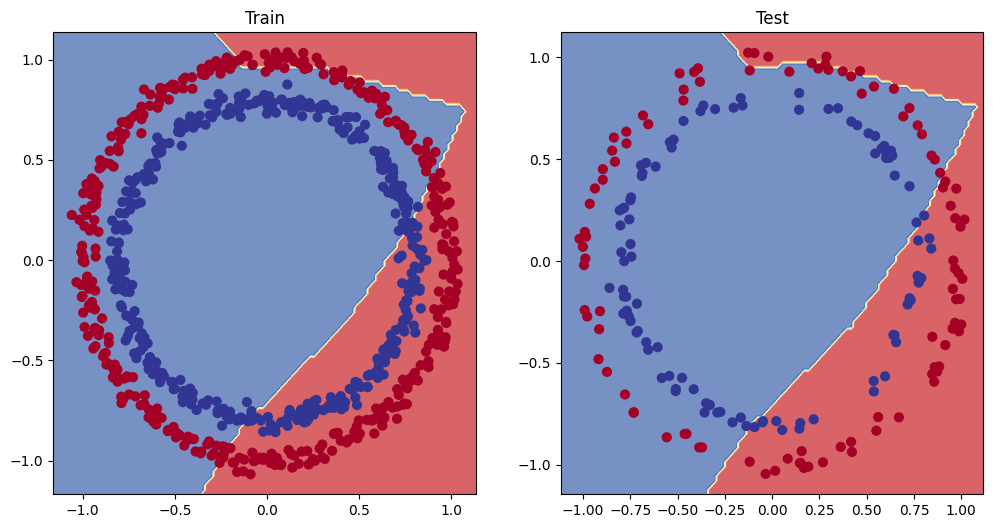

In [54]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_10, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_10, X=X_test, y=y_test)
plt.show()

In [55]:
# Check the accuracy of our model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on test set: {loss}")
print(f"Model accuracy on test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 6ms/step - loss: 0.6723 - accuracy: 0.6100
Model loss on test set: 0.6723183393478394
Model accuracy on test set: 61.00%


In [57]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_10.predict(X_test)


7/7 [==============================] - 0s 4ms/step


In [58]:

# View the first 10 predictions
y_preds[:10]

array([[0.51911277],
       [0.4643299 ],
       [0.5126187 ],
       [0.52547175],
       [0.5047981 ],
       [0.52547175],
       [0.52547175],
       [0.5192571 ],
       [0.50211143],
       [0.50252867]], dtype=float32)

In [59]:
# View the first 10 test labels
y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [60]:
# Convert prediction probabilities to binary format and view the first 10
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)>

In [61]:
# Create a confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[47, 54],
       [24, 75]])

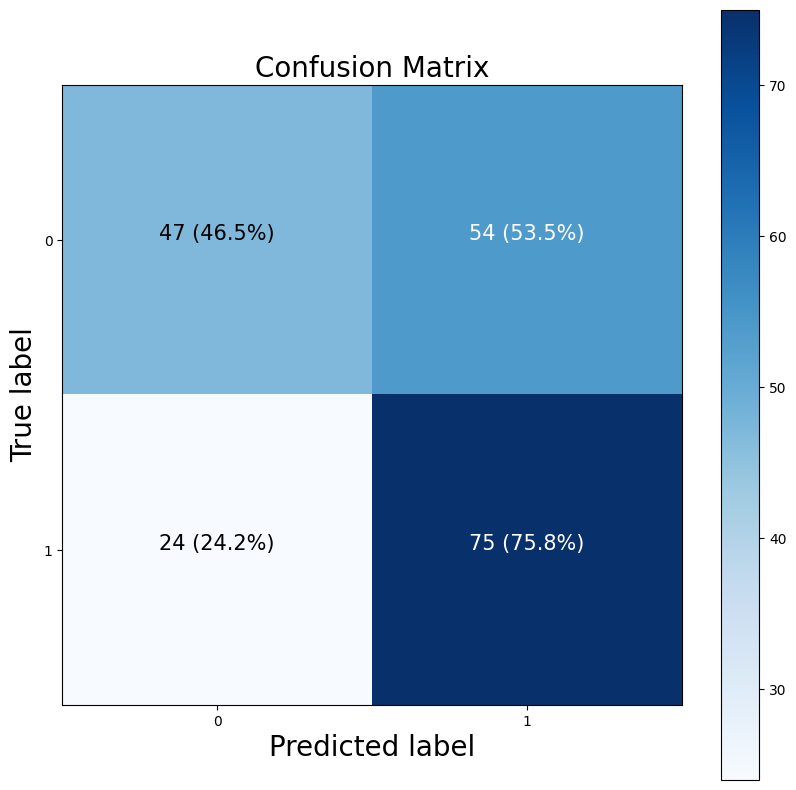

In [65]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb 
import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

In [66]:
# What does itertools.product do? Combines two things into each combination
import itertools
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  print(i, j)

0 0
0 1
1 0
1 1


In [67]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()
     

4422102/4422102 [==============================] - 1s 0us/step


In [68]:
# Show the first training example
print(f"Training sample:\n{train_data[0]}\n") 
print(f"Training label: {train_labels[0]}")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [69]:
# Check the shape of our data
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [70]:
# Check shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

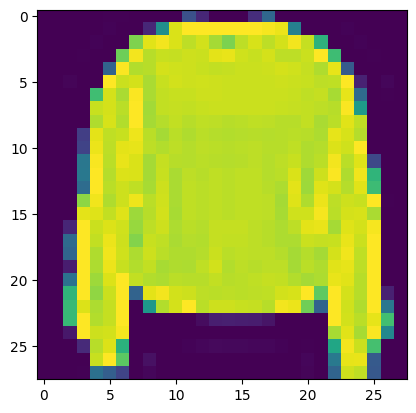

In [71]:
# Plot a single example
import matplotlib.pyplot as plt
plt.imshow(train_data[7]);

In [72]:
# Check our samples label
train_labels[7]
     

2

In [73]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# How many classes are there (this'll be our output shape)?
len(class_names)

10

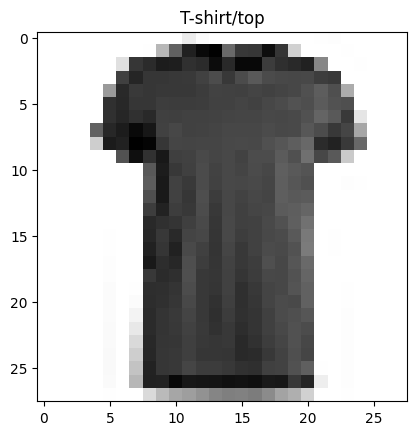

In [74]:
# Plot an example image and its label
plt.imshow(train_data[17], cmap=plt.cm.binary) # change the colours to black & white
plt.title(class_names[train_labels[17]]);

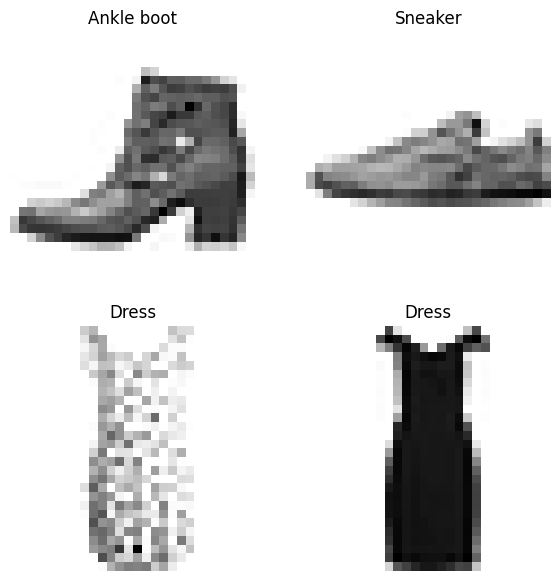

In [75]:
import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax=plt.subplot(2,2,i+1)
  rand_index=random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index],cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

In [76]:
tf.random.set_seed(42)

model_11=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classifcation
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
non_norm_history = model_11.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels)) # see how the model performs on the test set during training
     

Epoch 1/10
1875/1875 [==============================] - 8s 3ms/step - loss: 2.6226 - accuracy: 0.2074 - val_loss: 1.7762 - val_accuracy: 0.2706
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.6818 - accuracy: 0.2957 - val_loss: 1.5811 - val_accuracy: 0.3351
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5506 - accuracy: 0.3464 - val_loss: 1.4830 - val_accuracy: 0.3765
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.4710 - accuracy: 0.3795 - val_loss: 1.4532 - val_accuracy: 0.3974
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.3380 - accuracy: 0.4354 - val_loss: 1.2739 - val_accuracy: 0.4716
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.1800 - accuracy: 0.5189 - val_loss: 1.1191 - val_accuracy: 0.5301
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.0939 - accuracy: 0.5450 - val_loss: 1.0873 - val_accuracy:

In [77]:
# Check the shapes of our model
# Note: the "None" in (None, 784) is for batch_size, we'll cover this in a later module
model_11.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_28 (Dense)            (None, 4)                 3140      
                                                                 
 dense_29 (Dense)            (None, 4)                 20        
                                                                 
 dense_30 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [78]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

In [79]:
# Divide train and test images by the maximum value (normalize it)
train_data = train_data / 255.0
test_data = test_data / 255.0

# Check the min and max values of the training data
train_data.min(), train_data.max()

(0.0, 1.0)

In [80]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_12 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model (to the normalized data)
norm_history = model_12.fit(train_data,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 8s 3ms/step - loss: 1.1949 - accuracy: 0.5438 - val_loss: 0.8314 - val_accuracy: 0.7073
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.7589 - accuracy: 0.7314 - val_loss: 0.7536 - val_accuracy: 0.7158
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6896 - accuracy: 0.7550 - val_loss: 0.6728 - val_accuracy: 0.7567
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6384 - accuracy: 0.7739 - val_loss: 0.6457 - val_accuracy: 0.7698
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6159 - accuracy: 0.7814 - val_loss: 0.6295 - val_accuracy: 0.7684
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6015 - accuracy: 0.7859 - val_loss: 0.6358 - val_accuracy: 0.7722
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5931 - accuracy: 0.7890 - val_loss: 0.6226 - val_accuracy:

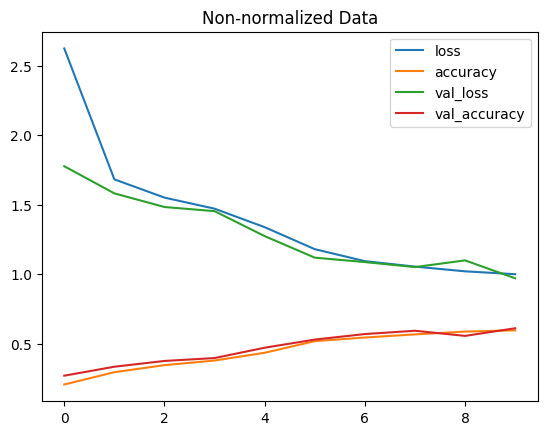

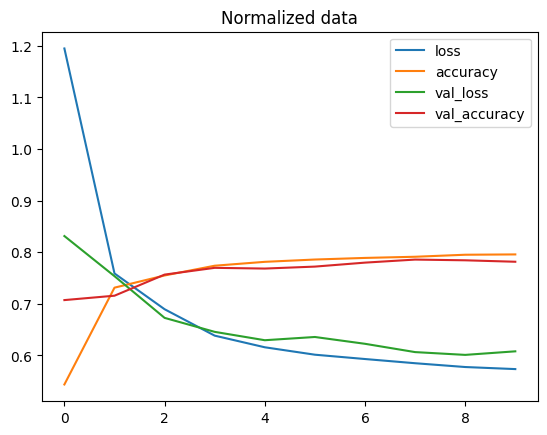

In [81]:
import pandas as pd
# Plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized Data")
# Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized data");

In [82]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_13 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
find_lr_history = model_13.fit(train_data,
                               train_labels,
                               epochs=40, # model already doing pretty good with current LR, probably don't need 100 epochs
                               validation_data=(test_data, test_labels),
                               callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 7s 3ms/step - loss: 1.1309 - accuracy: 0.6014 - val_loss: 0.8470 - val_accuracy: 0.6824 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7111 - accuracy: 0.7613 - val_loss: 0.6673 - val_accuracy: 0.7817 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5834 - accuracy: 0.8053 - val_loss: 0.5841 - val_accuracy: 0.8006 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5428 - accuracy: 0.8158 - val_loss: 0.5622 - val_accuracy: 0.8073 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5265 - accuracy: 0.8190 - val_loss: 0.5594 - val_accuracy: 0.8089 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5162 - accuracy: 0.8217 - val_loss: 0.5489 - val_accuracy: 0.8135 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 6s

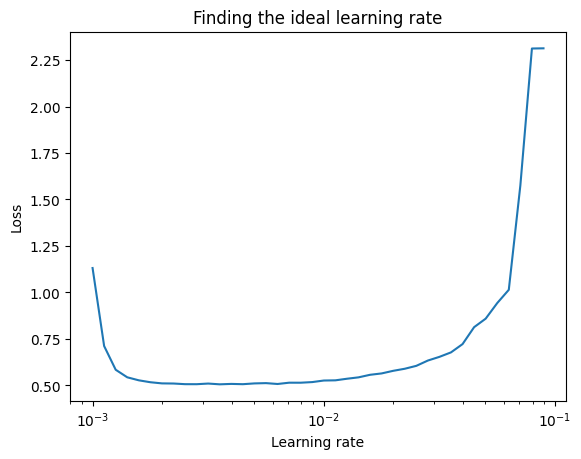

In [83]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt
lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"]) # want the x-axis to be log-scale
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

In [84]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_14 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(lr=0.001), # ideal learning rate (same as default)
                 metrics=["accuracy"])

# Fit the model
history = model_14.fit(train_data,
                       train_labels,
                       epochs=20,
                       validation_data=(test_data, test_labels))

Epoch 1/20
1875/1875 [==============================] - 8s 3ms/step - loss: 1.2038 - accuracy: 0.5240 - val_loss: 0.8354 - val_accuracy: 0.6783
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7456 - accuracy: 0.7236 - val_loss: 0.7205 - val_accuracy: 0.7376
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6693 - accuracy: 0.7553 - val_loss: 0.6796 - val_accuracy: 0.7507
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6363 - accuracy: 0.7671 - val_loss: 0.6553 - val_accuracy: 0.7642
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6176 - accuracy: 0.7746 - val_loss: 0.6427 - val_accuracy: 0.7690
Epoch 6/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.6051 - accuracy: 0.7836 - val_loss: 0.6618 - val_accuracy: 0.7690
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5954 - accuracy: 0.7886 - val_loss: 0.6288 - val_accuracy:

In [85]:

# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [86]:

# Make predictions with the most recent model
y_probs = model_14.predict(test_data) # "probs" is short for probabilities

# View the first 5 predictions
y_probs[:5]

313/313 [==============================] - 1s 2ms/step


array([[1.9799410e-12, 5.1301829e-15, 8.5678075e-06, 5.3028491e-17,
        2.7530357e-05, 5.1560783e-01, 6.4748065e-08, 5.7403617e-02,
        6.2493193e-08, 4.2695236e-01],
       [2.4670086e-05, 1.1469184e-15, 8.1411564e-01, 9.9249853e-10,
        1.7528047e-01, 1.4385583e-22, 1.0544164e-02, 0.0000000e+00,
        3.4909914e-05, 9.5212926e-08],
       [1.3674906e-02, 9.8184872e-01, 2.7157864e-04, 2.6870396e-03,
        6.9730104e-06, 6.4092709e-09, 1.5042010e-03, 2.7388210e-13,
        1.0375561e-06, 5.4696666e-06],
       [5.1227114e-03, 9.9349785e-01, 5.3519027e-05, 8.5379696e-04,
        8.9747158e-07, 2.0749816e-10, 4.7019313e-04, 5.6763495e-16,
        4.0918533e-08, 9.5534722e-07],
       [8.4400713e-02, 2.8727880e-05, 1.9915095e-01, 7.9550790e-03,
        6.4690500e-02, 3.0261506e-13, 6.4370453e-01, 0.0000000e+00,
        6.9374808e-05, 1.5973058e-07]], dtype=float32)

In [87]:
# See the predicted class number and label for the first example
y_probs[0].argmax(), class_names[y_probs[0].argmax()]

(5, 'Sandal')

In [88]:
# Convert all of the predictions from probabilities to labels
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([5, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [89]:
# Check out the non-prettified confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels, 
                 y_pred=y_preds)

array([[688,   8,  48,  67,   7,   0, 160,   1,  21,   0],
       [ 20, 931,   6,  29,   1,   0,   9,   0,   4,   0],
       [ 16,   1, 655,   6, 212,   0, 100,   0,  10,   0],
       [ 26,  15,   7, 770,  50,   0, 111,   0,  21,   0],
       [  1,   0, 125,  16, 777,   0,  71,   0,  10,   0],
       [  0,   0,   0,   1,   0, 897,   0,  53,   8,  41],
       [112,   2, 164,  33, 232,   0, 431,   2,  24,   0],
       [  0,   0,   0,   0,   0,  39,   0, 903,   3,  55],
       [  1,   0,  22,   7,  35,  11,   3,  10, 911,   0],
       [  0,   0,   1,   0,   0,  24,   0,  40,   0, 935]])

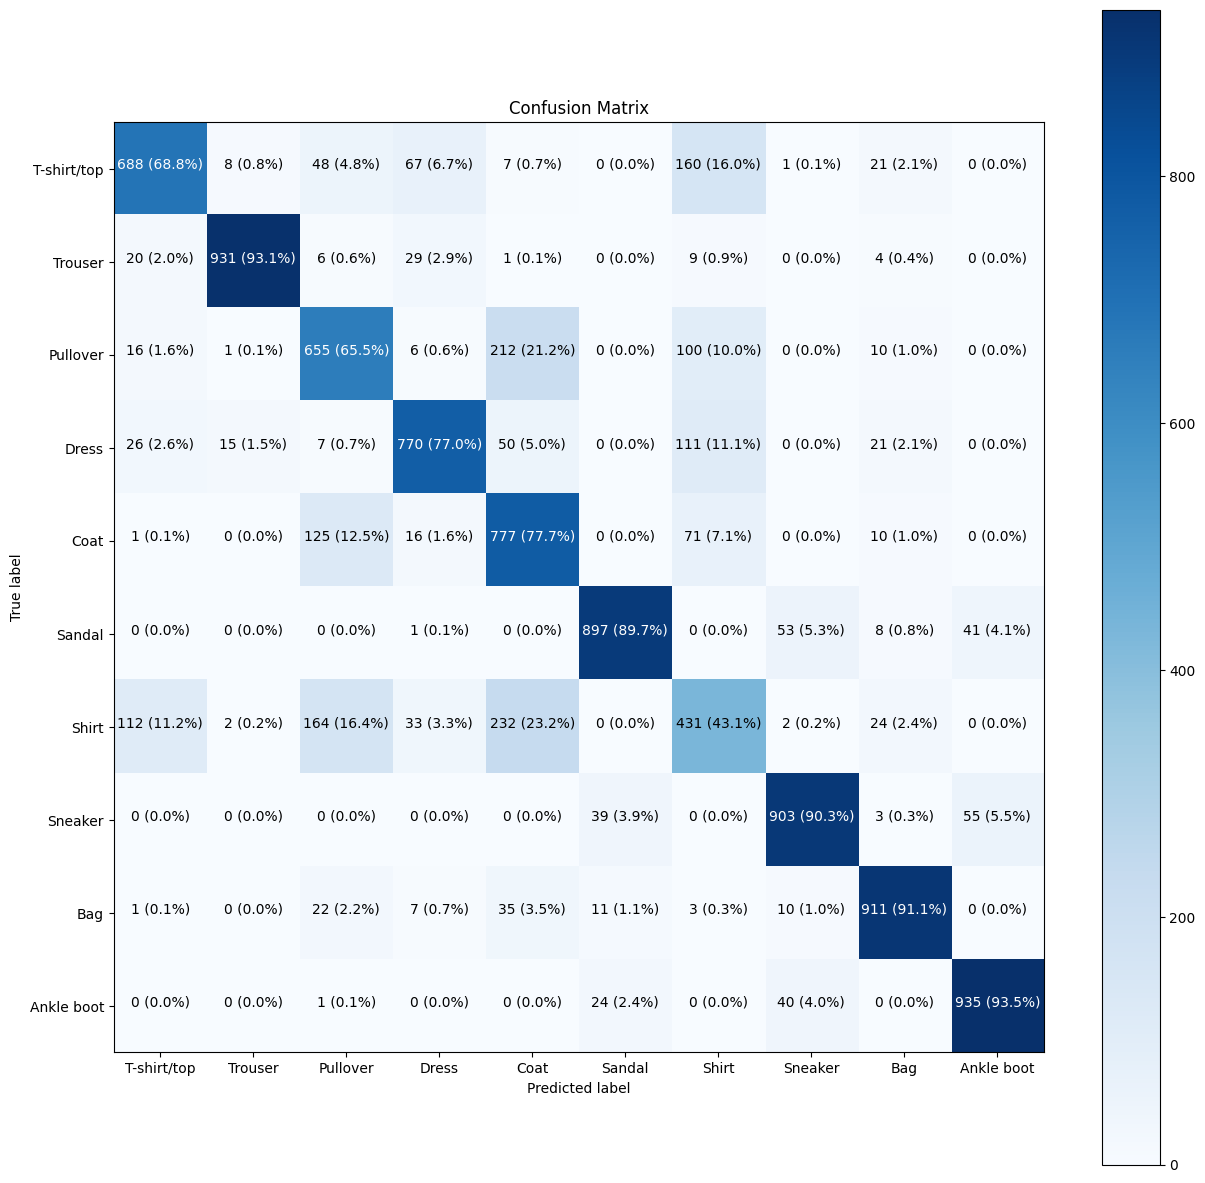

In [90]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels, 
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)
     

In [91]:
# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.
  
  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """ 
  # Setup random integer
  i = random.randint(0, len(images))
  
  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red
     


1/1 [==============================] - 0s 39ms/step


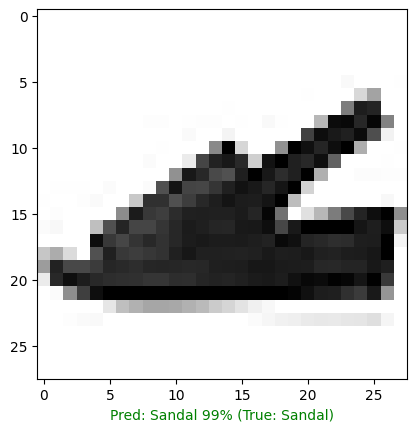

In [92]:
# Check out a random image as well as its prediction
plot_random_image(model=model_14, 
                  images=test_data, 
                  true_labels=test_labels, 
                  classes=class_names)

In [93]:
# Find the layers of our most recent model
model_14.layers

In [94]:
# Extract a particular layer
model_14.layers[1]

In [95]:
# Get the patterns of a layer in our network
weights, biases = model_14.layers[1].get_weights()

# Shape = 1 weight matrix the size of our input data (28x28) per neuron (4)
weights, weights.shape

(array([[ 0.061836  , -0.51250035,  0.46161968, -0.04046304],
        [-0.65001243, -0.83213294,  0.36762875,  0.5156584 ],
        [-0.05661708, -0.80582815,  0.17365249,  0.38637412],
        ...,
        [ 0.14799026,  0.04642361, -0.30245945, -0.07887273],
        [ 0.50317097, -0.0850971 , -0.41576883,  0.39703277],
        [-0.04728195, -0.03504554,  0.4590879 , -0.03463218]],
       dtype=float32),
 (784, 4))

In [96]:
# Shape = 1 bias per neuron (we use 4 neurons in the first layer)
biases, biases.shape

(array([2.4230323, 1.0991298, 1.421857 , 1.3489422], dtype=float32), (4,))

In [97]:
# Can now calculate the number of paramters in our model
model_14.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_37 (Dense)            (None, 4)                 3140      
                                                                 
 dense_38 (Dense)            (None, 4)                 20        
                                                                 
 dense_39 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


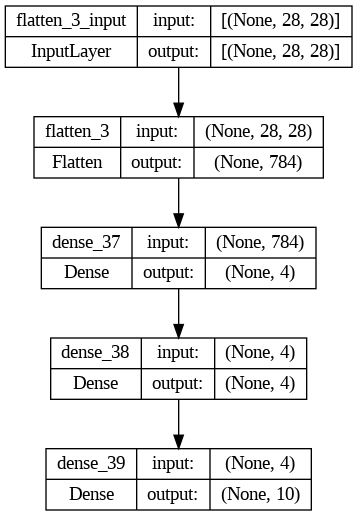

In [98]:
from tensorflow.keras.utils import plot_model

# See the inputs and outputs of each layer
plot_model(model_14, show_shapes=True)